In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
emails_df = pd.read_csv('email_table.csv')
email_opened_df= pd.read_csv('email_opened_table.csv')
link_clicked_df= pd.read_csv('link_clicked_table.csv')

In [3]:
emails_df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [4]:
email_opened_df.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [5]:
link_clicked_df.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [6]:
# merge the dataframes on email_id

emails_df['email_opened'] = emails_df['email_id'].isin(email_opened_df['email_id'])
emails_df['link_clicked'] = emails_df['email_id'].isin(link_clicked_df['email_id'])
emails_df

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked
0,85120,short_email,personalized,2,Sunday,US,5,False,False
1,966622,long_email,personalized,12,Sunday,UK,2,True,True
2,777221,long_email,personalized,11,Wednesday,US,2,False,False
3,493711,short_email,generic,6,Monday,UK,1,False,False
4,106887,long_email,generic,14,Monday,US,6,False,False
...,...,...,...,...,...,...,...,...,...
99995,803504,short_email,personalized,4,Monday,US,5,False,False
99996,899722,long_email,personalized,7,Saturday,US,1,False,False
99997,449610,long_email,personalized,11,Saturday,UK,6,False,False
99998,72497,short_email,generic,10,Monday,UK,0,False,False


In [7]:
## Deminishing the redundancy of the data, where there are some users who clicked on the link without opening the email.

link_clicked_without_opened = emails_df[(emails_df['link_clicked'] == True) & (emails_df['email_opened'] == False)]
print(f'The shape of the records before removing the wrong enteries: {link_clicked_without_opened.shape}')

## It is found in the data that there are some users who clicked on the link without opening the email.
## This is not possible in real life. So, we need to convert these records to opened.

emails_df.loc[link_clicked_without_opened.index, 'email_opened'] = True
link_clicked_without_opened = emails_df[(emails_df['link_clicked'] == True) & (emails_df['email_opened'] == False)]

print(f'The shape of the records after removing the wrong enteries: {link_clicked_without_opened.shape}')

The shape of the records before removing the wrong enteries: (50, 9)
The shape of the records after removing the wrong enteries: (0, 9)


# **User Activity**

Let us first look at the basic and important question: "What percentage of users opened the email and what percentage clicked on the link within the email?"


In [8]:
no_of_emails = emails_df['email_id'].nunique()
no_email_opened = emails_df[emails_df['email_opened'] == True]['email_id'].nunique()
no_link_clicked = emails_df[emails_df['link_clicked'] == True]['email_id'].nunique()

(no_of_emails,no_email_opened,no_link_clicked)

(100000, 10395, 2119)

In [9]:
## Percentage of users opened the mail
percentage_emails_opened = (no_email_opened/no_of_emails)*100

## Percentage of users clicked the link
percentage_links_clicked = (no_link_clicked/no_of_emails)*100


print(f'The total percentage of users opened the mail is {percentage_emails_opened:.2f}%')
print(f'The total percentage of users clicked the link is {percentage_links_clicked:.2f}%')


The total percentage of users opened the mail is 10.39%
The total percentage of users clicked the link is 2.12%


Text(0, 0.5, 'Percentage (%)')

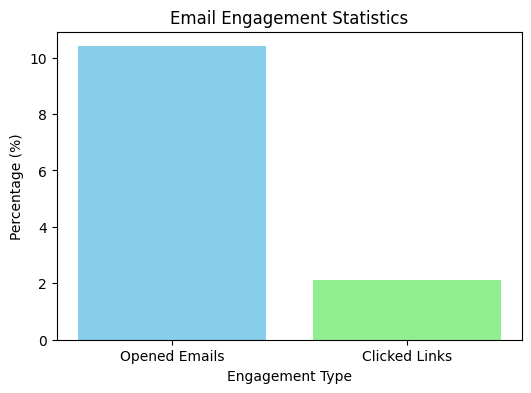

In [10]:
# Plotting the data
plt.figure(figsize=(6,4))
plt.bar(['Opened Emails', 'Clicked Links'], [percentage_emails_opened, percentage_links_clicked], color=['skyblue', 'lightgreen'])
plt.title('Email Engagement Statistics')
plt.xlabel('Engagement Type')
plt.ylabel('Percentage (%)')


In [11]:
## the conversion rate from opened emails to clicked links

conversion_rate = (no_link_clicked / no_email_opened) * 100
print(f'The conversion rate from opened emails to clicked links is {conversion_rate:.2f}%')

The conversion rate from opened emails to clicked links is 20.38%


# **Optimization of Email Campaign**

To optimize our email campaign, let's refine our targeting approach with these strategic elements:

- **Timing optimization** - Analyze user activity patterns to identify peak engagement periods across different days and hours, allowing us to schedule deliveries when recipients are most likely to be active.
- **Geographic targeting** - Leverage location data to map regional engagement patterns and customize delivery schedules according to time zone differences and local behavioral trends.
- **Content refinement** - Evaluate performance metrics across different email types and versions to determine which content elements drive the highest engagement, then adapt our messaging accordingly.

## Timeing optimization (Based on Day and Hour)
First, let us analyze user activity patterns to identify peak engagement periods across different days and hours, allowing us to schedule deliveries when recipients are most likely to be active.

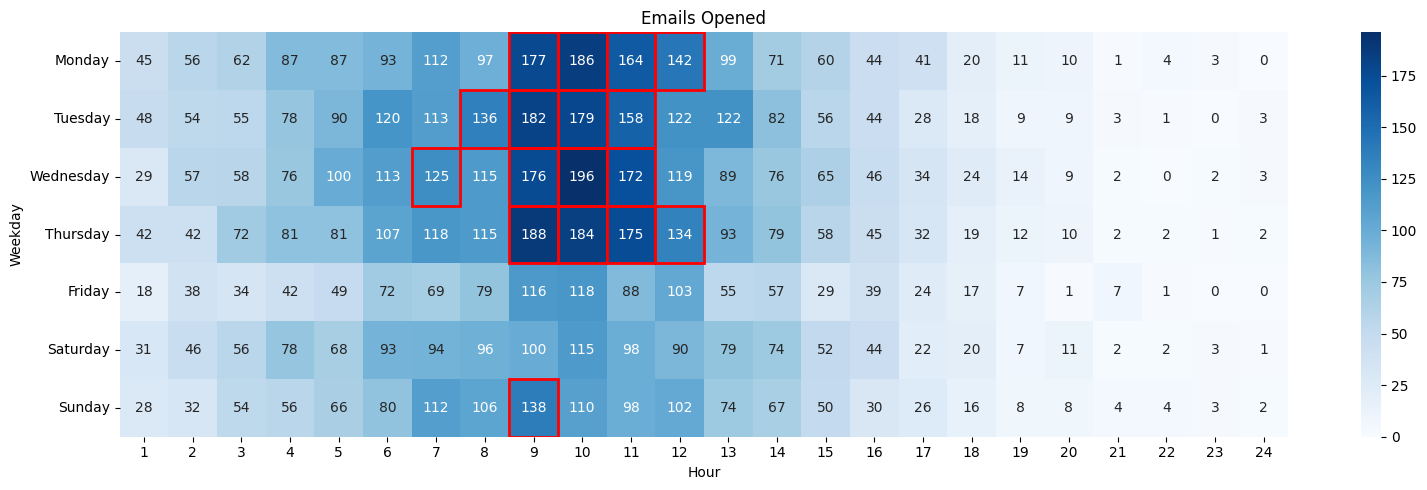

In [12]:
# No. of emails opened and links clicked on a specific day and hour

# Grouping data by weekday and hour for opened emails
opened_heatmap_data = emails_df[emails_df['email_opened']].groupby(['weekday', 'hour']).size().unstack(fill_value=0)
opened_heatmap_data = opened_heatmap_data.reindex((['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']))
# Plotting the heatmaps
plt.figure(figsize=(16,5))

# Heatmap for opened emails
sns.heatmap(opened_heatmap_data, cmap="Blues", annot=True, fmt="d")
plt.title('Emails Opened')
plt.xlabel('Hour')
plt.ylabel('Weekday')

opened_threshold = np.percentile(opened_heatmap_data.values, 90) 
if (opened_threshold)%1 > 0.5 :
    opened_threshold=np.ceil(opened_threshold)
else:
    clicked_threshold=np.floor(opened_threshold) 

for y in range(opened_heatmap_data.shape[0]):
    for x in range(opened_heatmap_data.shape[1]):
        if opened_heatmap_data.iloc[y, x] >= opened_threshold: 
            
            plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=False, edgecolor='red', lw=2))
        plt.tight_layout()

plt.tight_layout()
plt.show()

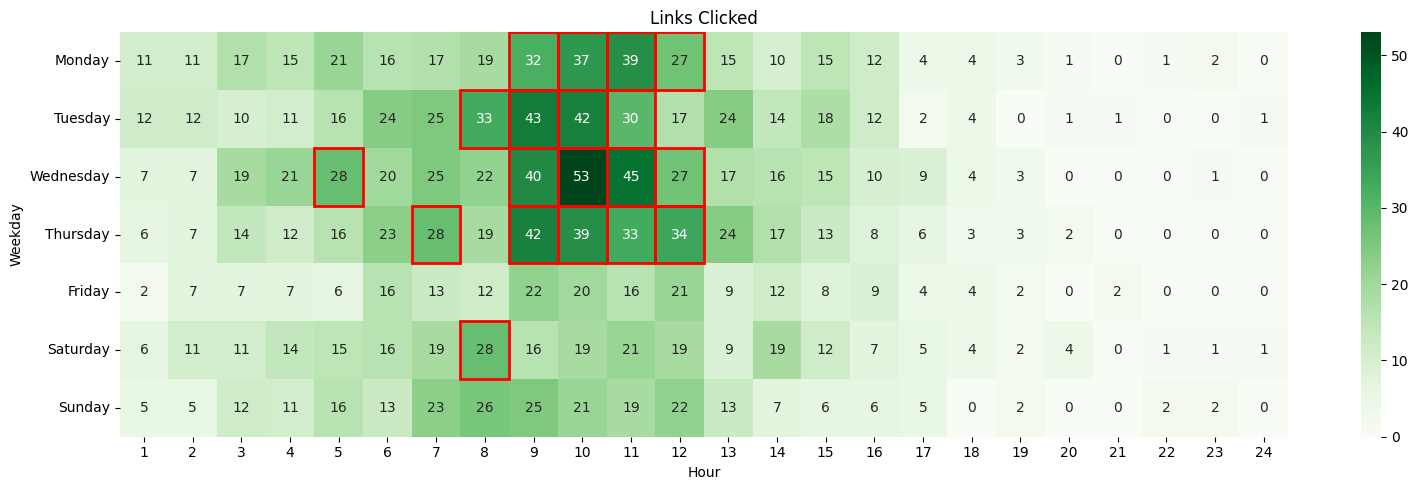

In [13]:
# Grouping data by weekday and hour for clicked links
clicked_heatmap_data = emails_df[emails_df['link_clicked']].groupby(['weekday', 'hour']).size().unstack(fill_value=0)

plt.figure(figsize=(16,5))
clicked_heatmap_data = clicked_heatmap_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# Heatmap for clicked links
sns.heatmap(clicked_heatmap_data, cmap="Greens", annot=True, fmt="d")
plt.title('Links Clicked')
plt.xlabel('Hour')
plt.ylabel('Weekday')

clicked_threshold = np.percentile(clicked_heatmap_data.values, 90)

if (clicked_threshold)%1 > 0.5 :
    clicked_threshold=np.ceil(clicked_threshold)
else:
    clicked_threshold=np.floor(clicked_threshold)

# Highlighting squares with high density
for y in range(clicked_heatmap_data.shape[0]):
    for x in range(clicked_heatmap_data.shape[1]):
        if clicked_heatmap_data.iloc[y, x] >= clicked_threshold:  # Threshold: mean density
            plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=False, edgecolor='red', lw=2))
        plt.tight_layout()
plt.show()

In [14]:
print(f'The threshold for opened emails is set as 90th percentile, which is equal to: {opened_threshold}')
print(f'The threshold for clicked links is set as 90th percentile, which is equal to: {clicked_threshold}')

The threshold for opened emails is set as 90th percentile, which is equal to: 123.0
The threshold for clicked links is set as 90th percentile, which is equal to: 27.0


## Geographic Targeting (Based on Geography)
Now, let us leverage the location data to map regional engagement patterns and customize delivery schedules according to time zone differences and local behavioral trends.

In [15]:
# Group by country and count the number of users who opened the email
country_opened_clicked_counts = emails_df[emails_df['link_clicked']].groupby('user_country').size()

print("Users who opened the email:")
print(country_opened_clicked_counts)


Users who opened the email:
user_country
ES      83
FR      80
UK     492
US    1464
dtype: int64


## Content Refinement (Based on Email Type and Version)
Also, let us evaluate the performance metrics across different email types and versions to determine which content elements drive the highest engagement, then adapt our messaging accordingly.

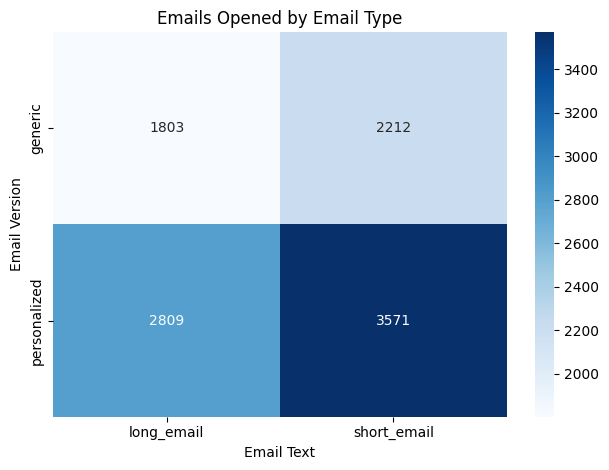

In [16]:
email_type_opened_heatmap_data = emails_df[emails_df['email_opened']].groupby(['email_version','email_text']).size().unstack(fill_value=0)


sns.heatmap(email_type_opened_heatmap_data, cmap="Blues", annot=True, fmt="d")
plt.title('Emails Opened by Email Type')
plt.xlabel('Email Text')
plt.ylabel('Email Version')
plt.tight_layout()
plt.show()

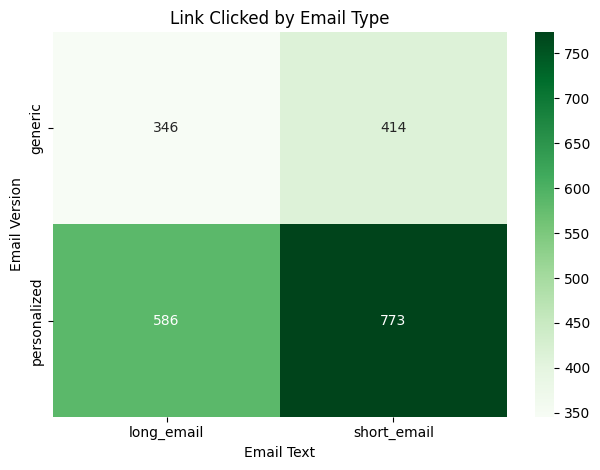

In [17]:
email_type_clicked_heatmap_data = emails_df[emails_df['link_clicked']].groupby(['email_version','email_text']).size().unstack(fill_value=0)

sns.heatmap(email_type_clicked_heatmap_data, cmap="Greens", annot=True, fmt="d")
plt.title('Link Clicked by Email Type')
plt.xlabel('Email Text')
plt.ylabel('Email Version')
plt.tight_layout()
plt.show()

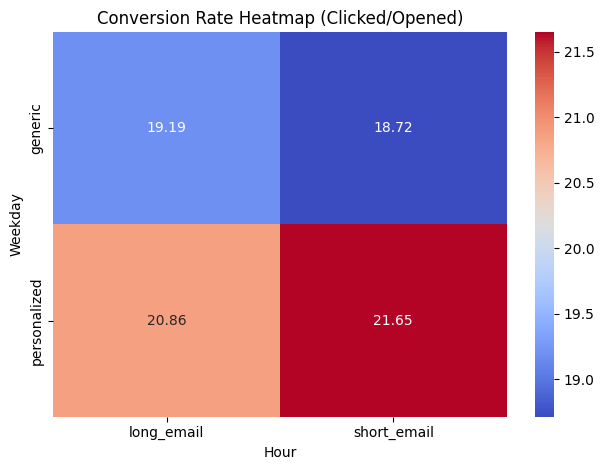

In [18]:
# Calculate conversion rate for each segment
conversion_rate_heatmap = (email_type_clicked_heatmap_data / email_type_opened_heatmap_data) * 100

sns.heatmap(conversion_rate_heatmap, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Conversion Rate Heatmap (Clicked/Opened)')
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()

# **Observations**

- When the heatmap is plotted between hours of the day, day of the week and no. of users opeing the emails, it is eveident that the during the Weekdays, i.e., Monday, Tuesday, Wednesday and Thursday in the time interval of 0900-1200 hrs, the users are actively viewing the emails.
- When the heatmap is plotted between hours of the day, day of the week and no. of users clciking on the link, it is eveident that the during the Weekdays, i.e., Monday, Tuesday and Wednesday in the time interval of 0900-1200 hrs, the users are actively clicking the link after reading the emails.
- Geogrpahically, the citizens of US are the majority of the population who are opening the email and clicking the link.
- When the email type and email version is being into consideration, the users who are sent a 'personalized' and 'short' email, they are more likely to open the email and click on the link. The conversion rate for this is about 21.6%.

# **Conclusions**

From the observations dereived from the dataset, it is evident that:

To perform the campaign successfully, it is advised that the emails are to be sent to the users:
- who are from the US
- in the weekdays from Monday to Wednesday
- in the time interval of 0900-1200 hrs
- emails must be 'personalized' and 'short'